In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/Praktikum ML/Project Kelompok

/content/drive/My Drive/Praktikum ML/Project Kelompok


In [ ]:
base_dir = "/content/drive/MyDrive/Praktikum ML/Project Kelompok/output"

In [ ]:

train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

train_normal_dir = os.path.join(train_dir, 'NORMAL')
train_pneumonia_dir = os.path.join(train_dir, 'PNEUMONIA')

val_normal_dir = os.path.join(val_dir, 'NORMAL')
val_pneumonia_dir = os.path.join(val_dir, 'PNEUMONIA')

test_normal_dir = os.path.join(test_dir, 'NORMAL')
test_pneumonia_dir = os.path.join(test_dir, 'PNEUMONIA')

NameError: ignored

In [ ]:
# Cek jumlah data train dan data validation
print('total training normal images:', len(os.listdir(train_normal_dir)))
print('total training pneumonia images:', len(os.listdir(train_pneumonia_dir)))
print('total val normal images:', len(os.listdir(val_normal_dir)))
print('total val pneumonia images:', len(os.listdir(val_pneumonia_dir)))
print('total test normal images:', len(os.listdir(test_normal_dir)))
print('total test pneumonia images:', len(os.listdir(test_pneumonia_dir)))

total training normal images: 1266
total training pneumonia images: 3418
total val normal images: 300
total val pneumonia images: 811
total test normal images: 17
total test pneumonia images: 44


In [ ]:
api_token = {"username":"qhistinj","key":"f709ed7ce69d920f8a14f668fff276cd"}
import json
import zipfile
import os
with open('kaggle.json', 'w') as file:
    json.dump(api_token, file)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.8,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

training_set = train_datagen.flow_from_directory("output/train/",
                                                 target_size=(128,128),
                                                 color_mode="rgb",
                                                 shuffle=False,
                                                 batch_size = 16,
                                                 class_mode='categorical')

Found 4684 images belonging to 2 classes.


In [ ]:
validation_datagen = ImageDataGenerator(width_shift_range=0.2,
                                        height_shift_range=0.2,
                                        rescale=1./255,
                                        shear_range=0.2,
                                        zoom_range=0.8,
                                        horizontal_flip=True,
                                        fill_mode='nearest')

validation_set = validation_datagen.flow_from_directory("output/val/",
                                                        target_size=(128,128),
                                                        color_mode="rgb",
                                                        shuffle=False,
                                                        batch_size = 16,
                                                        class_mode='categorical')

Found 1111 images belonging to 2 classes.


In [ ]:

test_datagen = ImageDataGenerator(width_shift_range=0.2,
                                        height_shift_range=0.2,
                                        rescale=1./255,
                                        shear_range=0.2,
                                        zoom_range=0.8,
                                        horizontal_flip=True,
                                        fill_mode='nearest')

test_set = validation_datagen.flow_from_directory("output/test/",
                                                        target_size=(128,128),
                                                        color_mode="rgb",
                                                        shuffle=False,
                                                        batch_size = 16,
                                                        class_mode='categorical')

Found 61 images belonging to 2 classes.


In [ ]:
# Pertama, kita import dulu library yang dibutuhkan
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input
from tensorflow.keras.applications.vgg19 import VGG19

In [ ]:
# Kita load model VGG19, kemudian kita potong bagian Top atau Fully Connected Layernya
baseModel = VGG19(include_top=False, input_tensor=Input(shape=(128, 128, 3)))

# Untuk perintah menolak men training data yang telah digunakan sebelumnya
for layer in baseModel.layers:
  layer.trainable = False

80150528/80134624 [==============================] - 0s 0us/step


In [ ]:
categories = ["NORMAL", "PNEUMONIA"]

x = Flatten()(baseModel.output)
x = Dense(1000, activation='relu')(x)

# Lapisan Terakhir dengan aktivasi softmax untuk output biner 
prediction = Dense(len(categories), activation='softmax')(x)

In [ ]:
# Membuat obbjek model 
model = Model(inputs=baseModel.input, outputs=prediction)

# Melihat struktur model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.8,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory("output/train",
                                                 target_size = (128, 128),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory("output/test",
                                            target_size = (128, 128),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 4684 images belonging to 2 classes.
Found 61 images belonging to 2 classes.


In [ ]:
# Mencocokan model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/30
293/293 [==============================] - 803s 3s/step - loss: 0.3981 - accuracy: 0.8397 - val_loss: 0.2829 - val_accuracy: 0.8525
Epoch 2/30
293/293 [==============================] - 71s 242ms/step - loss: 0.2874 - accuracy: 0.8762 - val_loss: 0.1924 - val_accuracy: 0.9180
Epoch 3/30
293/293 [==============================] - 71s 242ms/step - loss: 0.2780 - accuracy: 0.8796 - val_loss: 0.2115 - val_accuracy: 0.9180
Epoch 4/30
293/293 [==============================] - 71s 243ms/step - loss: 0.2537 - accuracy: 0.8947 - val_loss: 0.2297 - val_accuracy: 0.9016
Epoch 5/30
293/293 [==============================] - 71s 241ms/step - loss: 0.2720 - accuracy: 0.8811 - val_loss: 0.1595 - val_accuracy: 0.9508
Epoch 6/30
293/293 [==============================] - 71s 241ms/step - loss: 0.2556 - accuracy: 0.8926 - val_loss: 0.2091 - val_accuracy: 0.9344
Epoch 7/30
293/293 [==============================] - 71s 241ms/step - loss: 0.2470 - accuracy: 0.8962 - val_loss: 0.2110 - val_accu

In [ ]:
import numpy as np
xts, yts = zip(*(test_set[i] for i in range(len(test_set))))
x_test, y_test = np.vstack(xts), np.vstack(yts )

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
pred = model.predict(x_test)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_test, labels))
print(labels)

              precision    recall  f1-score   support

           0       0.81      1.00      0.89        17
           1       1.00      0.91      0.95        44

   micro avg       0.93      0.93      0.93        61
   macro avg       0.90      0.95      0.92        61
weighted avg       0.95      0.93      0.94        61
 samples avg       0.93      0.93      0.93        61

[[0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [1 0]]


In [ ]:
pip install matplotlib

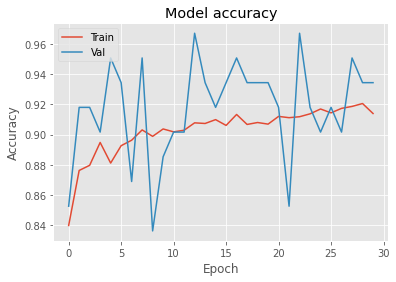

In [ ]:
# plot training and validation accuracy values
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()

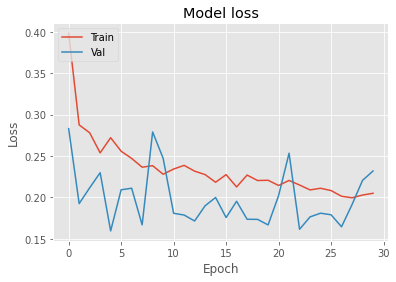

In [ ]:

# plot training and validation loss values
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/Praktikum ML/Project Kelompok/xray2_model.h5')

In [ ]:
from tensorflow.keras.models import load_model
from PIL import Image
import time

class FeatureExtractor:
    def __init__(self, model):
        self.model = model
    
    def extract(self, img):
        img = img.resize((224, 224))
        img = img.convert('RGB')
        
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        
        feature = self.model.predict(x)[0]
        
        return feature / np.linalg.norm(feature)

fe = FeatureExtractor(load_model('/content/drive/MyDrive/Praktikum ML/Project Kelompok/xray2_model.h5', compile=False))

In [ ]:
# class FeatureExtractor:
#     def __init__(self, model):
#         self.model = model
    
#     def extract(self, img):
#         img = img.resize((224, 224))
#         img = img.convert('RGB')
        
#         x = image.img_to_array(img)
#         x = np.expand_dims(x, axis=0)
#         x = preprocess_input(x)
        
#         feature = self.model.predict(x)[0]
        
#         return feature / np.linalg.norm(feature)

fe = load_model('/content/drive/MyDrive/Praktikum ML/Project Kelompok/xray2_model.h5')

In [ ]:
mkdir extract

In [ ]:
from random import shuffle

target_dir = '/content/drive/MyDrive/Praktikum ML/Project Kelompok/resize'

shuffle(train_normal_dir)
shuffle(train_pneumonia_dir)

for i, img_path in enumerate(norm_img_dir):
    image = cv2.imread(img_path)
    image = cv2.resize(image, (180,180))

    file_name = f"normal-{i + 1}.jpeg"
    dest = os.path.join(target_dir, file_name)
    
    cv2.imwrite(dest, image)

for i, img_path in enumerate(pneu_img_dir):
    image = cv2.imread(img_path)
    image = cv2.resize(image, (180,180))

    file_name = f"pneumonia-{i + 1}.jpeg"
    dest = os.path.join(target_dir, file_name)
    
    cv2.imwrite(dest, image)

In [ ]:
base_dir = '/content/drive/MyDrive/Praktikum ML/Project Kelompok/output'
feature_dir = '/content/drive/MyDrive/Praktikum ML/Project Kelompok/extract'

img_paths = list()
features = list()

for img_path in sorted(Path(base_dir).glob("*.jpeg")):
    img_paths.append(img_path)
    feature = fe.extract(img=Image.open(img_path))
    features.append(feature)

features = np.array(features)
np.save(feature_dir + '/extracted_feature.npy', features)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os

query_image = img_paths[150]
img = Image.open(query_image)

query = fe.extract(img)

dists = np.linalg.norm(features - query, axis=1)

# Extract 9 images that have lowest distance
ids = np.argsort(dists)[:12]
scores = [(dists[id], img_paths[id]) for id in ids]

# Visualize the result
axes = list()
fig = plt.figure(figsize=(8,8))

for a in range(3 * 3):
    axes.append(fig.add_subplot(3, 3, a+1))

    score = scores[a]

    nama_citra = os.path.basename(score[1])

    subplot_title = str(score[0]) + f"\n{nama_citra}"
    axes[-1].set_title(subplot_title)  

    plt.axis('off')
    plt.imshow(Image.open(score[1]))

fig.tight_layout()
plt.show()